In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.6 MB/s eta 0:00:00


## Importação de dataset

In [2]:
df = pd.read_csv("/content/laptop_data.csv")
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Label enconder

In [3]:
label_encoder = LabelEncoder()
cols = ['Company', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'ScreenResolution', 'TypeName']

for col in cols:
  df[col] = label_encoder.fit_transform(df[col])
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,13.3,23,65,8,4,58,8,1.37kg,71378.6832
1,1,1,4,13.3,1,63,8,2,51,8,1.34kg,47895.5232
2,2,7,3,15.6,8,74,8,16,53,4,1.86kg,30636.0000
3,3,1,4,15.4,25,85,1,29,9,8,1.83kg,135195.3360
4,4,1,4,13.3,23,67,8,16,59,8,1.37kg,96095.8080


## Tranformação de dados

In [4]:
# remove kg from string and convert into float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
# convert into float
df['Inches'] = df['Inches'].astype(float)

## Standard scaler

In [5]:
# Standard scaler data
standart_scaler = StandardScaler()
df['Weight'] = standart_scaler.fit_transform(df[['Weight']])
df['Inches'] = standart_scaler.fit_transform(df[['Inches']])
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,-1.204407,23,65,8,4,58,8,-1.005283,71378.6832
1,1,1,4,-1.204407,1,63,8,2,51,8,-1.050381,47895.5232
2,2,7,3,0.408772,8,74,8,16,53,4,-0.268684,30636.0000
3,3,1,4,0.268495,25,85,1,29,9,8,-0.313782,135195.3360
4,4,1,4,-1.204407,23,67,8,16,59,8,-1.005283,96095.8080


## Busca por correlação

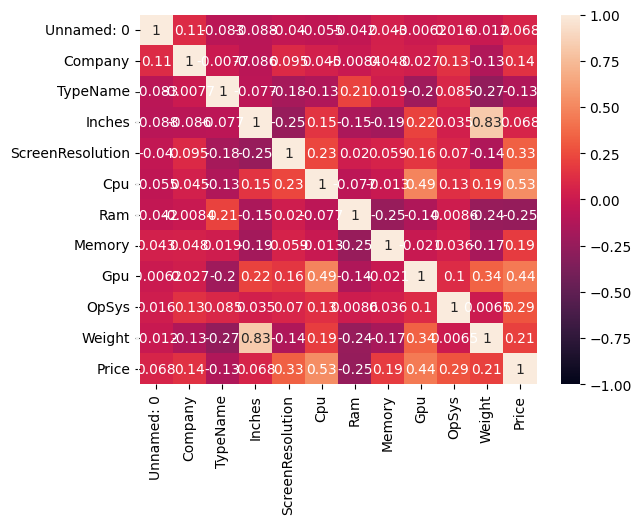

In [6]:
df.corr()
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True);

## Dados de treinamento

In [7]:
y = df['Price']
X = df.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Treinamento do modelo

In [8]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
y = model.predict(X_test)

Learning rate set to 0.040351
0:	learn: 35741.8771930	total: 50.2ms	remaining: 50.2s
1:	learn: 35001.2948536	total: 51.9ms	remaining: 25.9s
2:	learn: 34247.4694171	total: 54ms	remaining: 17.9s
3:	learn: 33583.5495465	total: 56.1ms	remaining: 14s
4:	learn: 32890.0077089	total: 59.8ms	remaining: 11.9s
5:	learn: 32220.9220861	total: 63.5ms	remaining: 10.5s
6:	learn: 31632.4253369	total: 67.2ms	remaining: 9.53s
7:	learn: 30986.9254575	total: 70.9ms	remaining: 8.79s
8:	learn: 30419.3997543	total: 74.6ms	remaining: 8.22s
9:	learn: 29900.6797830	total: 78.4ms	remaining: 7.76s
10:	learn: 29338.2143839	total: 79.6ms	remaining: 7.16s
11:	learn: 28854.7785051	total: 82.3ms	remaining: 6.78s
12:	learn: 28463.6782526	total: 83.8ms	remaining: 6.36s
13:	learn: 28001.3277762	total: 85.4ms	remaining: 6.01s
14:	learn: 27555.5550789	total: 86.8ms	remaining: 5.7s
15:	learn: 27134.3446033	total: 88.2ms	remaining: 5.42s
16:	learn: 26659.7878218	total: 90.5ms	remaining: 5.23s
17:	learn: 26246.9790040	total: 9

## Validação

In [9]:
mse = mean_squared_error(y_test, y)
r2 = r2_score(y_test, y)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

CatBoost Mean Squared Error: 262053704.3025856
CatBoost R-squared: 0.8276073606515698


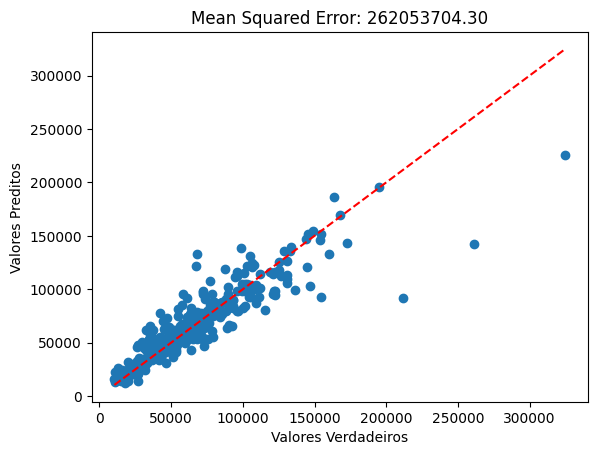

In [10]:
plt.scatter(y_test, y)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title(f'Mean Squared Error: {mse:.2f}')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.show()

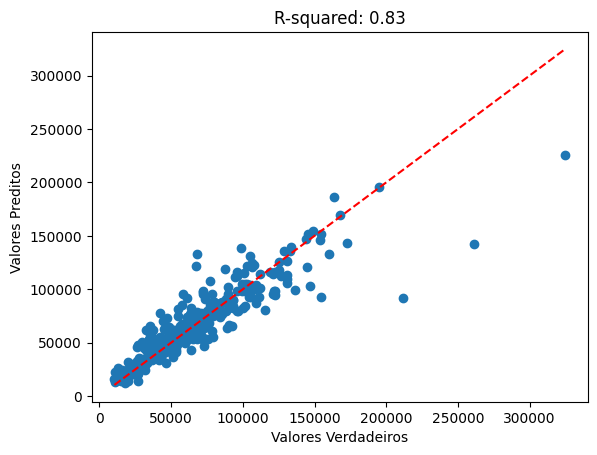

In [11]:
plt.scatter(y_test, y)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title(f'R-squared: {r2:.2f}')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.show()

<Axes: xlabel='Price'>

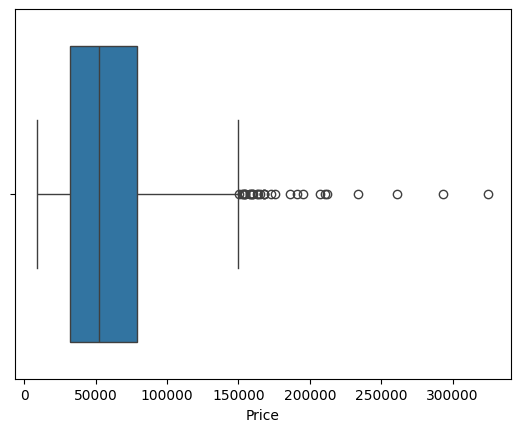

In [12]:
sns.boxplot(x=df['Price'])

## Remover outliers

In [13]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os outliers
df_filtrado = df[(df['Price'] >= limite_inferior) & (df['Price'] <= limite_superior)]

# Agora 'df_filtrado' contém o conjunto de dados sem os outliers
df_filtrado

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,1,4,-1.204407,23,65,8,4,58,8,-1.005283,71378.6832
1,1,1,4,-1.204407,1,63,8,2,51,8,-1.050381,47895.5232
2,2,7,3,0.408772,8,74,8,16,53,4,-0.268684,30636.0000
3,3,1,4,0.268495,25,85,1,29,9,8,-0.313782,135195.3360
4,4,1,4,-1.204407,23,67,8,16,59,8,-1.005283,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,10,0,-0.713439,13,89,5,4,47,5,-0.358880,33992.6400
1299,1299,10,0,-1.204407,19,89,1,29,47,5,-1.110512,79866.7200
1300,1300,10,3,-0.713439,0,34,3,35,40,5,-0.809859,12201.1200
1301,1301,7,3,0.408772,0,89,7,10,21,5,0.227393,40705.9200


In [14]:
y = df_filtrado['Price']
X = df_filtrado.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostRegressor()
model.fit(X_train, y_train)
y = model.predict(X_test)

mse = mean_squared_error(y_test, y)
r2 = r2_score(y_test, y)

Learning rate set to 0.040203
0:	learn: 30859.9812566	total: 1.35ms	remaining: 1.35s
1:	learn: 30245.3976442	total: 2.42ms	remaining: 1.21s
2:	learn: 29612.6513379	total: 3.44ms	remaining: 1.14s
3:	learn: 29048.6209786	total: 8.68ms	remaining: 2.16s
4:	learn: 28457.7970853	total: 11.8ms	remaining: 2.35s
5:	learn: 27873.6653822	total: 14.7ms	remaining: 2.44s
6:	learn: 27405.5893290	total: 15.9ms	remaining: 2.26s
7:	learn: 26879.5386466	total: 16.9ms	remaining: 2.1s
8:	learn: 26362.9637116	total: 18ms	remaining: 1.98s
9:	learn: 25930.3059427	total: 19ms	remaining: 1.89s
10:	learn: 25403.6505231	total: 20.2ms	remaining: 1.82s
11:	learn: 24976.9918805	total: 21.3ms	remaining: 1.75s
12:	learn: 24552.2988678	total: 23.1ms	remaining: 1.75s
13:	learn: 24114.3401894	total: 24.8ms	remaining: 1.75s
14:	learn: 23681.3144458	total: 25.8ms	remaining: 1.69s
15:	learn: 23348.8534910	total: 26.9ms	remaining: 1.65s
16:	learn: 23000.5057649	total: 28.3ms	remaining: 1.63s
17:	learn: 22616.7679181	total: 2

<Axes: xlabel='Price'>

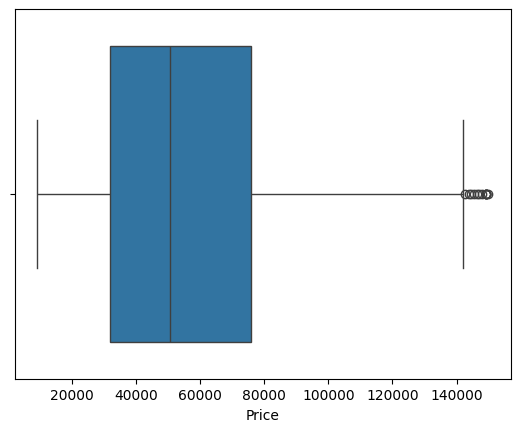

In [15]:
sns.boxplot(x=df_filtrado['Price'])

In [16]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

CatBoost Mean Squared Error: 122499879.14464653
CatBoost R-squared: 0.8827289571740422


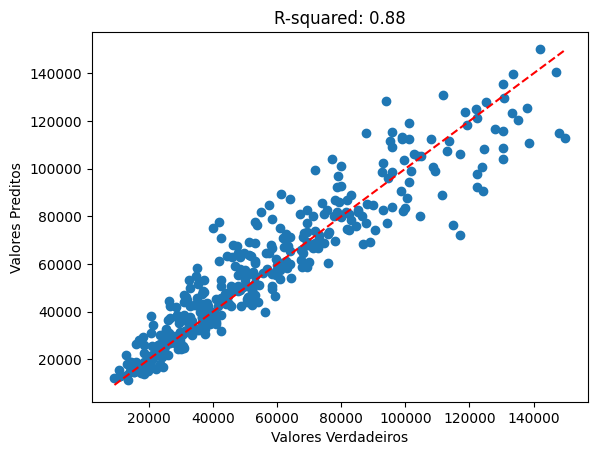

In [17]:

plt.scatter(y_test, y)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title(f'R-squared: {r2:.2f}')
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.show()